1. PREDICT MODELING

1.1. Choose model

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
import time
pd.options.display.max_colwidth =None

mpl.style.use('ggplot')
sns.set_style('dark')
pylab.rcParams['figure.figsize'] = 10,6
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, r2_score

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, VotingClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier as xgbc

In [67]:
train = pd.read_csv("../data/train_d.csv")
X_test = pd.read_csv("../data/test_d.csv")
Id_test = pd.read_csv("../data/test.csv")["PassengerId"]
sub = pd.read_csv("../data/gender_submission1.csv")
print(train.shape)
print(X_test.shape)
print(Id_test.shape)

(891, 50)
(418, 49)
(418,)


In [16]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
y_test = sub.sort_values("PassengerId")["Survived"]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(891, 49)
(891,)
(418, 49)
(418,)


In [17]:
MLA = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
     
    LogisticRegressionCV(solver='lbfgs', max_iter=1000),
    RidgeClassifierCV(),
    Perceptron(),

    #KNeighborsClassifier(n_neighbors=3),
    SVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    xgbc() 
]

In [18]:
MLA1 = [
    make_pipeline(RobustScaler(),AdaBoostClassifier()),
    make_pipeline(RobustScaler(),BaggingClassifier()),
    make_pipeline(RobustScaler(),ExtraTreesClassifier()),
    make_pipeline(RobustScaler(),GradientBoostingClassifier()),
     
    make_pipeline(RobustScaler(),LogisticRegressionCV(solver='lbfgs', max_iter=1000)),
    make_pipeline(RobustScaler(),RidgeClassifierCV()),
    make_pipeline(RobustScaler(),Perceptron()),

    #KNeighborsClassifier(n_neighbors=3),
    make_pipeline(RobustScaler(),SVC()),
    make_pipeline(RobustScaler(),DecisionTreeClassifier()),
    make_pipeline(RobustScaler(),ExtraTreeClassifier()),
    make_pipeline(RobustScaler(),xgbc()) 
]

In [97]:
result=[]
name=[]
result1=[]
name1=[]

cv_split = ShuffleSplit(n_splits = 20, test_size = .2, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Score']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = cross_val_score(alg, X_train, y_train, cv  = cv_split, scoring="accuracy")
    MLA_compare.loc[row_index, 'MLA Score'] = cv_results.mean()
    MLA_compare.loc[row_index, 'MLA Std'] = cv_results.std()
    result.append(cv_results)
    name.append(MLA_name)
    row_index+=1

row_index = 0
for alg in MLA1:
    cv_results1 = cross_val_score(alg, X_train, y_train, cv  = cv_split, scoring="accuracy")
    MLA_compare.loc[row_index, 'MLA Score1'] = cv_results1.mean()
    MLA_compare.loc[row_index, 'MLA Std1'] = cv_results1.std()
    result1.append(cv_results1)
    row_index+=1 

MLA_compare.sort_values(by = ['MLA Score'], ascending = False, inplace = True, ignore_index=True)

MLA_compare

,MLA Name,MLA Parameters,MLA Score,MLA Std,MLA Score1,MLA Std1
0,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': None, 'cv': None, 'fit_intercept': True, 'scoring': None, 'store_cv_values': False}",0.832,0.025,0.833,0.026
1,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}",0.828,0.029,0.830,0.028
2,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}",0.823,0.027,0.821,0.027
3,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}",0.813,0.024,0.814,0.024
4,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",0.809,0.027,0.806,0.021
5,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}",0.808,0.027,0.808,0.027
6,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}",0.786,0.026,0.789,0.027
7,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}",0.775,0.031,0.779,0.029
8,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}",0.772,0.025,0.767,0.028
9,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.627,0.027,0.837,0.023


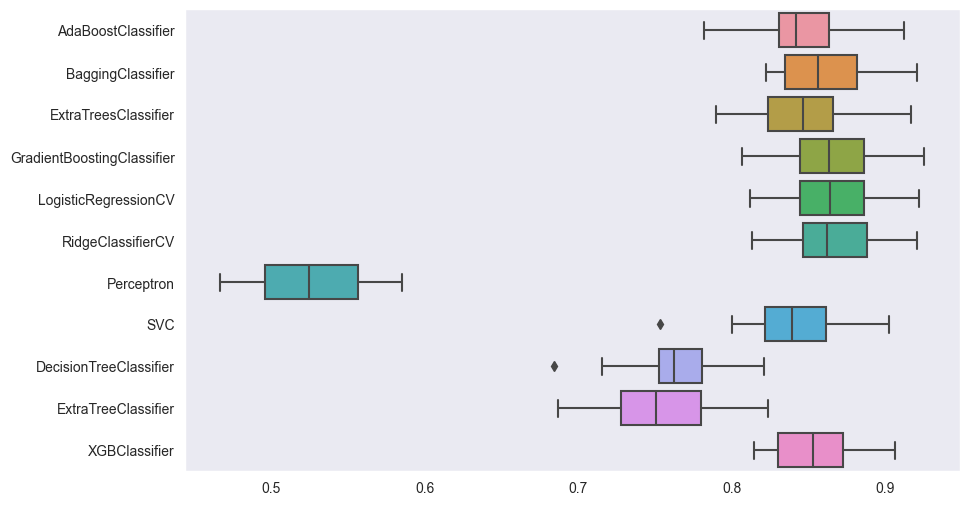

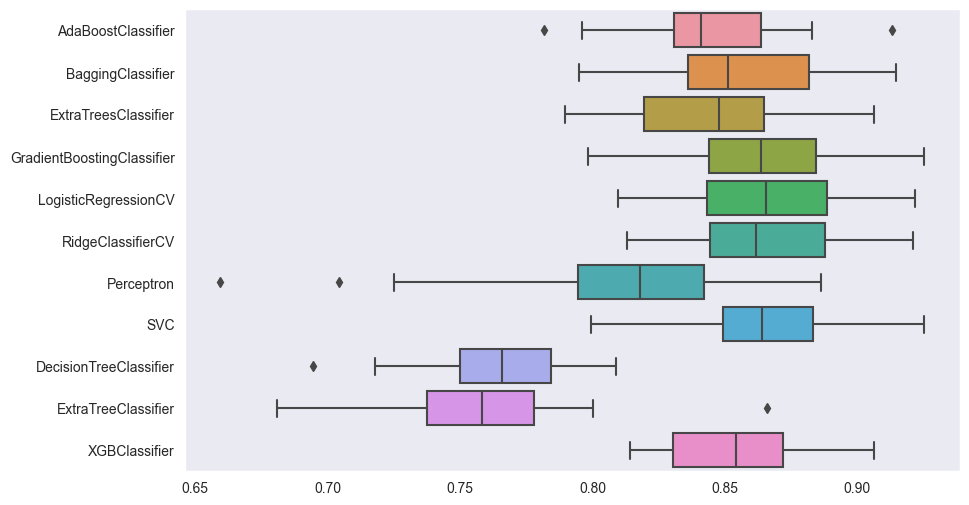

In [21]:
ax=sns.boxplot(result, orient="h")
ax.set_yticklabels(name)
plt.show()

ax=sns.boxplot(result1, orient="h")
ax.set_yticklabels(name)
plt.show()

In [99]:
MLA_compare.iloc[[1,3,4,5,6],[0,1]]

,MLA Name,MLA Parameters
1,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}"
3,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}"
4,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}"
5,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}"
6,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}"


In [178]:
param_grid = [
    [{
    #GradientBoostingClassifier
    "learning_rate":[0.05,0.06],
    "n_estimators":[290,280],
    "max_depth":[1,2],
    "random_state":[1,3]
    }],
    [{
    #BaggingClassifier
    "n_estimators":[12,13],
    "max_samples":[495,490],
    "random_state":[1,3]
    }],
    [{
    #AdaBoostClassifier
    "learning_rate":[0.1,0.2],
    "n_estimators":[85,95],
    "random_state":[1,3]
    }],
    [{
    #ExtraTreeClassifier
    "criterion":["gini","entropy", "log_loss"],
    "max_features":["sqrt","log2",None],
    "random_state":[None,1]
    }],
    [{
    #XgboostClassifier
    "learning_rate":[0.02, 0.04],
    "n_estimators":[90,92],
    "max_depth":[6,7],
    "random_state":[1,3]
    }]  
]

vote_est = [
    ('gbc', GradientBoostingClassifier()),
    ('bgc', BaggingClassifier()),
    ("abc", AdaBoostClassifier()),
    ("etc", ExtraTreeClassifier()),
    ("xgb", xgbc())
    ]

In [136]:
"""param_grid = [
    [{
    #GradientBoostingClassifier
    "learning_rate":[0.01, 0.005],
    "n_estimators":[308,310],
    "max_depth":[2,3],
    "random_state":[1,3]
    }],
        
    [{
    #RidgeClassifierCV
    #"alphas":alphas_g,
    "fit_intercept":[True],
    "cv":[8,10]
    }],

    [{
    #LogisticRegressionCV
    "Cs":[150, 160],
    "fit_intercept":[True],
    "cv":[5,6],
    "random_state":[1,3]
    }],

    [{
    #BaggingClassifier
    #"estimator":
    "n_estimators":[7,8,9],
    "max_samples":[550,600],
    "random_state":[5]
    }]

]

vote_est = [
    ('ada', GradientBoostingClassifier()),
    ("rc", RidgeClassifierCV()),
    ('lr', LogisticRegressionCV()),
    ('bc', BaggingClassifier())
    ]
    """

'param_grid = [\n    [{\n    #GradientBoostingClassifier\n    "learning_rate":[0.01, 0.005],\n    "n_estimators":[308,310],\n    "max_depth":[2,3],\n    "random_state":[1,3]\n    }],\n        \n    [{\n    #RidgeClassifierCV\n    #"alphas":alphas_g,\n    "fit_intercept":[True],\n    "cv":[8,10]\n    }],\n\n    [{\n    #LogisticRegressionCV\n    "Cs":[150, 160],\n    "fit_intercept":[True],\n    "cv":[5,6],\n    "random_state":[1,3]\n    }],\n\n    [{\n    #BaggingClassifier\n    #"estimator":\n    "n_estimators":[7,8,9],\n    "max_samples":[550,600],\n    "random_state":[5]\n    }]\n\n]\n\nvote_est = [\n    (\'ada\', GradientBoostingClassifier()),\n    ("rc", RidgeClassifierCV()),\n    (\'lr\', LogisticRegressionCV()),\n    (\'bc\', BaggingClassifier())\n    ]\n    '

In [179]:
vote_alg = {}
start_total = time.perf_counter()
for clf, param in zip(vote_est, param_grid):
    start = time.perf_counter()        
    best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'accuracy')
    best_search.fit(X_train, y_train)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    best_score = best_search.best_score_
    vote_alg[clf[1].__class__.__name__]=best_search.best_estimator_
    print('The best parameter for {} is {} with a runtime of {:.3f} seconds, score {:.3f}'.format(clf[1].__class__.__name__, best_param, run, best_score))
    clf[1].set_params(**best_param) 

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.3f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 290, 'random_state': 1} with a runtime of 77.328 seconds, score 0.837
The best parameter for BaggingClassifier is {'max_samples': 490, 'n_estimators': 12, 'random_state': 3} with a runtime of 6.790 seconds, score 0.821
The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 85, 'random_state': 1} with a runtime of 21.488 seconds, score 0.834
The best parameter for ExtraTreeClassifier is {'criterion': 'gini', 'max_features': None, 'random_state': None} with a runtime of 1.515 seconds, score 0.778
The best parameter for XGBClassifier is {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 90, 'random_state': 1} with a runtime of 24.133 seconds, score 0.832
Total optimization time was 2.188 minutes.
----------


In [24]:
"""
'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 10 0.867
'cv': 5, 'fit_intercept': True 0.869
'Cs': 100, 'cv': 3, 'fit_intercept': True, 'random_state': 1
'max_samples': 3, 'n_estimators': 300, 'random_state': 1

'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 350, 'random_state': 1 0.867
'cv': 5, 'fit_intercept': True 0.869
'Cs': 100, 'cv': 3, 'fit_intercept': True, 'random_state': 1 0.868
'max_samples': 5, 'n_estimators': 400, 'random_state': 5 0.847

'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 300, 'random_state': 1 0.871
'cv': 6, 'fit_intercept': True 0.869
'Cs': 100, 'cv': 6, 'fit_intercept': True, 'random_state': 1 0.868
'max_samples': 7, 'n_estimators': 450, 'random_state': 5 0.850

'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 310, 'random_state': 1 0.872
'cv': 8, 'fit_intercept': True 0.869
'Cs': 110, 'cv': 6, 'fit_intercept': True, 'random_state': 1 0.868
'max_samples': 7, 'n_estimators': 550, 'random_state': 5 0.850

'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 310, 'random_state': 1 0.872
'cv': 10, 'fit_intercept': True 0.869
'Cs': 150, 'cv': 6, 'fit_intercept': True, 'random_state': 1 0.869
'max_samples': 7, 'n_estimators': 550, 'random_state': 5 0.850

'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 308, 'random_state': 1 0.872
'cv': 10, 'fit_intercept': True 0.869
'Cs': 150, 'cv': 6, 'fit_intercept': True, 'random_state': 1 0.869
'max_samples': 2, 'n_estimators': 10, 'random_state': 5 0.612 
"""

"\n'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 10 0.867\n'cv': 5, 'fit_intercept': True 0.869\n'Cs': 100, 'cv': 3, 'fit_intercept': True, 'random_state': 1\n'max_samples': 3, 'n_estimators': 300, 'random_state': 1\n\n'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 350, 'random_state': 1 0.867\n'cv': 5, 'fit_intercept': True 0.869\n'Cs': 100, 'cv': 3, 'fit_intercept': True, 'random_state': 1 0.868\n'max_samples': 5, 'n_estimators': 400, 'random_state': 5 0.847\n\n'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 300, 'random_state': 1 0.871\n'cv': 6, 'fit_intercept': True 0.869\n'Cs': 100, 'cv': 6, 'fit_intercept': True, 'random_state': 1 0.868\n'max_samples': 7, 'n_estimators': 450, 'random_state': 5 0.850\n\n'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 310, 'random_state': 1 0.872\n'cv': 8, 'fit_intercept': True 0.869\n'Cs': 110, 'cv': 6, 'fit_intercept': True, 'random_state': 1 0.868\n'max_samples': 7, 'n_estimators': 550, 'random_

In [197]:
#grid_hard = VotingClassifier(estimators=vote_est, voting='hard')
#grid_hard_cv = cross_val_score(grid_hard, X_train, y_train, cv=cv_split, scoring="roc_auc")
#grid_hard.fit(X_train, y_train)

#grid_hard_bs = grid_hard_cv.mean()
#print('The best score for hard is {:.3f}'.format(grid_hard_bs))

grid_soft = VotingClassifier(estimators=list(vote_alg.items()), voting='hard', weights=[3,1,2,1,2])
#grid_soft_cv = cross_validate(grid_soft, X_train, y_train, cv=cv_split)
grid_soft.fit(X_train, y_train)

#grid_soft_bs = grid_soft_cv.mean()
#print('The best score for soft is {:.3f}'.format(grid_soft_bs))

VotingClassifier(estimators=[('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=1,
                                                         n_estimators=290,
                                                         random_state=1)),
                             ('BaggingClassifier',
                              BaggingClassifier(max_samples=490,
                                                n_estimators=12,
                                                random_state=3)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=85,
                                                 random_state=1)),
                             ('ExtraTreeClassifi...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.02, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=90, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=1, ...))],
                 weights=[3, 1, 2, 1, 2])

In [198]:
predict = grid_soft.predict(X_test)

In [199]:
subm = pd.DataFrame()
subm['PassengerId'] = Id_test
subm['Survived'] = predict.astype(int)
print(subm.head())
subm.to_csv('../data/submission13.csv',index=False)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [68]:
print(sub.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
